In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [256]:
data=pd.read_csv("auto_mpg_dataset.csv",sep=",")

In [257]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [258]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [259]:
data['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [260]:
data['model_year'].value_counts()

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model_year, dtype: int64

In [261]:
data["car_name"].nunique()

305

In [262]:
data["car_name"].values[:15]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii'], dtype=object)

In [263]:
data['brand'] = data["car_name"].str.extract('(^.*?)\s')
data["brand"].value_counts()[:10]

ford          51
chevrolet     43
plymouth      31
dodge         28
amc           28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: brand, dtype: int64

In [264]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
data['brand'] = data['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes','mercedes-benz')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace('nissan','datsun')

In [265]:
#Checking for any null values in brand
data[data['brand'].isnull()]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
150,4,108.0,93.0,2391.0,15.5,74,3,subaru,26.0,NaN
346,4,97.0,67.0,2065.0,17.8,81,3,subaru,32.3,NaN


In [266]:
data['brand'].fillna(value = 'subaru',inplace=True) 

In [267]:
data["brand"]=data["brand"].str.capitalize()

In [268]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0,Ford


In [269]:
def country(x):
    if x==1:
        return "USA"
    elif x==2:
        return "Europe"
    elif x==3:
        return "Japan"

In [270]:
data["origin"]=data["origin"].apply(country)

In [271]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,17.0,Ford


<AxesSubplot:>

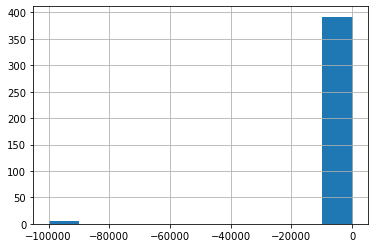

In [272]:
data["horsepower"].hist()

In [273]:
#Range of horsepower
print("minimum value: {} \nmaximum value : {}".format(data["horsepower"].min(),data.horsepower.max()))

minimum value: -100000.0 
maximum value : 230.0


In [274]:
data[data["horsepower"]<=0]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
32,4,98.0,-100000.0,2046.0,19.0,71,USA,ford pinto,25.0,Ford
126,6,200.0,-100000.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
330,4,85.0,-100000.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
336,4,140.0,-100000.0,2905.0,14.3,80,USA,ford mustang cobra,23.6,Ford
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault
374,4,151.0,-100000.0,3035.0,20.5,82,USA,amc concord dl,23.0,Amc


In [275]:
data[data["car_name"]=="ford pinto"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
32,4,98.0,-100000.0,2046.0,19.0,71,USA,ford pinto,25.0,Ford
112,4,122.0,85.0,2310.0,18.5,73,USA,ford pinto,19.0,Ford
130,4,122.0,80.0,2451.0,16.5,74,USA,ford pinto,26.0,Ford
168,4,140.0,83.0,2639.0,17.0,75,USA,ford pinto,23.0,Ford
174,6,171.0,97.0,2984.0,14.5,75,USA,ford pinto,18.0,Ford
206,4,140.0,72.0,2565.0,13.6,76,USA,ford pinto,26.5,Ford


In [276]:
data[data["car_name"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
17,6,200.0,85.0,2587.0,16.0,70,USA,ford maverick,21.0,Ford
100,6,250.0,88.0,3021.0,16.5,73,USA,ford maverick,18.0,Ford
126,6,200.0,-100000.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
155,6,250.0,72.0,3158.0,19.5,75,USA,ford maverick,15.0,Ford
193,6,200.0,81.0,3012.0,17.6,76,USA,ford maverick,24.0,Ford


In [277]:
data[data["car_name"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


In [278]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
79,4,96.0,69.0,2189.0,18.0,72,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83.0,2202.0,15.3,76,Europe,renault 12tl,27.0,Renault
218,4,79.0,58.0,1825.0,18.6,77,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,-100000.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


In [279]:
cars=data[data["horsepower"]<=0]["car_name"].unique()
cars

array(['ford pinto', 'ford maverick', 'renault lecar deluxe',
       'ford mustang cobra', 'renault 18i', 'amc concord dl'],
      dtype=object)

In [280]:
for car in cars:
    med=0
    brand=data[data["car_name"]==cars[3]]["brand"].values
    med=data.loc[(data["car_name"]==car) & (data["horsepower"]>0),"horsepower"].median()
   
    data.loc[(data["car_name"]==car) & (data["horsepower"]<=0),"horsepower"]=np.nan
    data.fillna(med,inplace=True)
    med_brand=data.loc[(data["brand"]==brand[0]) & (data["horsepower"]>0),"horsepower"].median()
    data.fillna(med_brand,inplace=True)

In [281]:
data[data["car_name"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
17,6,200.0,85.0,2587.0,16.0,70,USA,ford maverick,21.0,Ford
100,6,250.0,88.0,3021.0,16.5,73,USA,ford maverick,18.0,Ford
126,6,200.0,83.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
155,6,250.0,72.0,3158.0,19.5,75,USA,ford maverick,15.0,Ford
193,6,200.0,81.0,3012.0,17.6,76,USA,ford maverick,24.0,Ford


In [282]:
data[data["horsepower"]<=0]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand


In [283]:
data[data["car_name"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
354,4,100.0,89.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


In [284]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
79,4,96.0,69.0,2189.0,18.0,72,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83.0,2202.0,15.3,76,Europe,renault 12tl,27.0,Renault
218,4,79.0,58.0,1825.0,18.6,77,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,89.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,89.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


<AxesSubplot:>

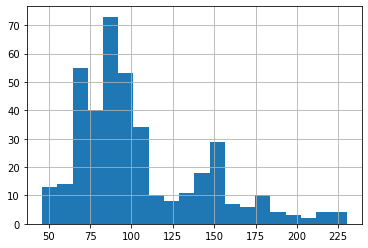

In [285]:
data["horsepower"].hist(bins=20)

In [286]:
data.drop("car_name",axis=1,inplace=True)

In [287]:
data.to_csv('mlcar.csv')

PermissionError: [Errno 13] Permission denied: 'mlcar.csv'

In [288]:
data.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
cylinders,1.000000,0.950721,0.841842,0.896017,-0.505419,-0.348746,-0.775396
displacement,0.950721,1.000000,0.896334,0.932824,-0.543684,-0.370164,-0.804203
horsepower,0.841842,0.896334,1.000000,0.863053,-0.687740,-0.413533,-0.773662
weight,0.896017,0.932824,0.863053,1.000000,-0.417457,-0.306564,-0.831741
acceleration,-0.505419,-0.543684,-0.687740,-0.417457,1.000000,0.288137,0.420289
model_year,-0.348746,-0.370164,-0.413533,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773662,-0.831741,0.420289,0.579267,1.000000


In [290]:
#Dependent variable

y=data.iloc[:,7].values

In [291]:
#Independent variable

x=data.drop("mpg",axis=1).values

In [292]:
x[:15]

array([[8, 307.0, 130.0, 3504.0, 12.0, 70, 'USA', 'Chevrolet'],
       [8, 350.0, 165.0, 3693.0, 11.5, 70, 'USA', 'Buick'],
       [8, 318.0, 150.0, 3436.0, 11.0, 70, 'USA', 'Plymouth'],
       [8, 304.0, 150.0, 3433.0, 12.0, 70, 'USA', 'Amc'],
       [8, 302.0, 140.0, 3449.0, 10.5, 70, 'USA', 'Ford'],
       [8, 429.0, 198.0, 4341.0, 10.0, 70, 'USA', 'Ford'],
       [8, 454.0, 220.0, 4354.0, 9.0, 70, 'USA', 'Chevrolet'],
       [8, 440.0, 215.0, 4312.0, 8.5, 70, 'USA', 'Plymouth'],
       [8, 455.0, 225.0, 4425.0, 10.0, 70, 'USA', 'Pontiac'],
       [8, 390.0, 190.0, 3850.0, 8.5, 70, 'USA', 'Amc'],
       [8, 383.0, 170.0, 3563.0, 10.0, 70, 'USA', 'Dodge'],
       [8, 340.0, 160.0, 3609.0, 8.0, 70, 'USA', 'Plymouth'],
       [8, 400.0, 150.0, 3761.0, 9.5, 70, 'USA', 'Chevrolet'],
       [8, 455.0, 225.0, 3086.0, 10.0, 70, 'USA', 'Buick'],
       [4, 113.0, 95.0, 2372.0, 15.0, 70, 'Japan', 'Toyota']],
      dtype=object)

In [293]:
y[:15]

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15., 15., 14., 15.,
       14., 24.])

In [294]:
x.shape

(398, 8)

In [295]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],
                    remainder="passthrough")
x_s=np.array(ct.fit_transform(x))
x_s[35]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 250.0, 100.0, 3329.0, 15.5,
       71, 'Chevrolet'], dtype=object)

In [296]:
x_s[:,8:]

array([[307.0, 130.0, 3504.0, 12.0, 70, 'Chevrolet'],
       [350.0, 165.0, 3693.0, 11.5, 70, 'Buick'],
       [318.0, 150.0, 3436.0, 11.0, 70, 'Plymouth'],
       ...,
       [135.0, 84.0, 2295.0, 11.6, 82, 'Dodge'],
       [120.0, 79.0, 2625.0, 18.6, 82, 'Ford'],
       [119.0, 82.0, 2720.0, 19.4, 82, 'Chevrolet']], dtype=object)

In [297]:
from sklearn.preprocessing import LabelEncoder
le_brand=LabelEncoder()
le_year=LabelEncoder()
x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
x_s[:,12]=le_year.fit_transform(x_s[:,12])
x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 307.0, 130.0, 3504.0,
        12.0, 0, 5],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 350.0, 165.0, 3693.0,
        11.5, 0, 3]], dtype=object)

In [298]:
x_s

array([[0.0, 0.0, 0.0, ..., 12.0, 0, 5],
       [0.0, 0.0, 0.0, ..., 11.5, 0, 3],
       [0.0, 0.0, 0.0, ..., 11.0, 0, 19],
       ...,
       [0.0, 1.0, 0.0, ..., 11.6, 12, 8],
       [0.0, 1.0, 0.0, ..., 18.6, 12, 10],
       [0.0, 1.0, 0.0, ..., 19.4, 12, 5]], dtype=object)

In [299]:
newdata=pd.DataFrame(x_s,columns=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
newdata.head()

,3,4,5,6,8,Europe,Japan,USA,displacement,horsepower,weight,acceleration,model_year,brand
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,307.0,130.0,3504.0,12.0,0,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,350.0,165.0,3693.0,11.5,0,3
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,318.0,150.0,3436.0,11.0,0,19
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,304.0,150.0,3433.0,12.0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,302.0,140.0,3449.0,10.5,0,10


In [300]:
newdata=pd.DataFrame(x_s,columns=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
newdata.head()

,3,4,5,6,8,Europe,Japan,USA,displacement,horsepower,weight,acceleration,model_year,brand
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,307.0,130.0,3504.0,12.0,0,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,350.0,165.0,3693.0,11.5,0,3
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,318.0,150.0,3436.0,11.0,0,19
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,304.0,150.0,3433.0,12.0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,302.0,140.0,3449.0,10.5,0,10


In [354]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.003,random_state=101)

In [ ]:
x_train=df

In [345]:
x_train

array([[0.0, 0.0, 0.0, ..., 17.8, 6, 0],
       [0.0, 1.0, 0.0, ..., 17.9, 10, 13],
       [0.0, 0.0, 0.0, ..., 12.5, 3, 10],
       ...,
       [0.0, 1.0, 0.0, ..., 17.0, 10, 12],
       [0.0, 0.0, 0.0, ..., 8.0, 0, 19],
       [0.0, 1.0, 0.0, ..., 16.2, 11, 10]], dtype=object)

In [346]:
x_test.shape

(1, 14)

In [347]:
#x_test=np.array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 135.0, 85.0, 2500.0,
        17.5, 4, 10]])

In [ ]:
#x_test=np.array([[1650,4,670]])

In [348]:
x_train[:1]

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 258.0, 95.0, 3193.0,
        17.8, 6, 0]], dtype=object)

In [316]:
#x_train_scaled=x_train
#x_test_scaled=x_test

In [317]:
#x_test_scaled[0]

In [350]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled[:,8:12]=sc.fit_transform(x_train_scaled[:,8:12])
x_test_scaled[:,8:12]=sc.transform(x_test_scaled[:,8:12])
x_train_scaled

array([[0.0, 0.0, 0.0, ..., -0.947763819451482, 1, 19],
       [0.0, 1.0, 0.0, ..., -0.5852454625341568, 1, 24],
       [0.0, 1.0, 0.0, ..., -0.4039862840754942, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 0.5023096082178192, 10, 12],
       [0.0, 0.0, 0.0, ..., -2.760355604038109, 0, 19],
       [0.0, 1.0, 0.0, ..., 0.21229492268395866, 11, 10]], dtype=object)

In [351]:
x_train

array([[0.0, 0.0, 0.0, ..., 17.8, 6, 0],
       [0.0, 1.0, 0.0, ..., 17.9, 10, 13],
       [0.0, 0.0, 0.0, ..., 12.5, 3, 10],
       ...,
       [0.0, 1.0, 0.0, ..., 17.0, 10, 12],
       [0.0, 0.0, 0.0, ..., 8.0, 0, 19],
       [0.0, 1.0, 0.0, ..., 16.2, 11, 10]], dtype=object)

In [352]:
x_test


array([[0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.35e+02, 8.50e+01, 2.50e+03, 1.75e+01,
        4.00e+00, 1.00e+01]])

In [336]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg_fs=LinearRegression()
Linreg.fit(x_train,y_train)

LinearRegression()

In [337]:
P_linreg=Linreg.predict(x_test)

In [338]:
from sklearn.metrics import mean_squared_error,r2_score
mse_linreg=mean_squared_error(y_test,P_linreg)

print(np.sqrt(mse_linreg))

1.361217521333515


In [341]:
lin_score=r2_score(y_test,P_linreg)
print(lin_score)

nan


In [342]:
sc_y=StandardScaler()
y_train_svm=y_train.reshape(len(y_train),1)
ys_train=sc_y.fit_transform(y_train_svm)
y_test_svm=y_test.reshape(len(y_test),1)
ys_test=sc_y.transform(y_test_svm)

In [343]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train_scaled,ys_train)

ValueError: Found input variables with inconsistent numbers of samples: [278, 397]

In [110]:
Ps_svr=svr.predict(x_test_scaled)
P_svr=sc_y.inverse_transform(Ps_svr)

In [111]:
mse_svr=mean_squared_error(y_test,P_svr)
print(np.sqrt(mse_svr))

3.061010631454694


In [112]:
svr_score=r2_score(y_test,P_svr)*100
print(svr_score)

85.04973638637351


In [232]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

ValueError: Found input variables with inconsistent numbers of samples: [398, 845]

In [228]:
x_train

,displacement,cylinders,weight
148,1498,4,1070
290,998,3,810
4,624,2,710
534,3198,5,2394
34,998,3,830
...,...,...,...
599,6598,12,2608
575,3993,8,1995
838,1498,4,1147
337,1193,4,1135


In [114]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101)
randomforest.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [115]:
P_forest=randomforest.predict(x_test)

In [116]:
forest_score=r2_score(y_test,P_forest)*100
print(forest_score)

91.03895020178076


In [117]:
from sklearn.linear_model import Lasso
lass=Lasso()
lass.fit(x_train,y_train)

Lasso()

In [118]:
P_lasso=lass.predict(x_test)

In [119]:
lasso_score=r2_score(y_test,P_lasso)*100
print(lasso_score)

81.08347246593218


In [120]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [121]:
P_ridge=ridge.predict(x_test)

In [122]:
ridge_score=r2_score(y_test,P_ridge)*100
print(ridge_score)

85.23246723113603


In [123]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train,y_train)

ElasticNet()

In [124]:
P_elastic=elastic.predict(x_test)

In [125]:
elastic_score=r2_score(y_test,P_elastic)*100
print(elastic_score)

81.2184476795696


In [127]:
Score=pd.DataFrame({"Model_name":["Linear Regression","Support Vector Regression", "Random Forest Regression","Lasso Regression",
                                 "Ridge Regression","Elastic Net Regression"],
                   "Accuracy_score":[lin_score,svr_score,forest_score,lasso_score,ridge_score,elastic_score]})

In [128]:
Score

,Model_name,Accuracy_score
0,Linear Regression,85.219421
1,Support Vector Regression,85.049736
2,Random Forest Regression,91.038950
3,Lasso Regression,81.083472
4,Ridge Regression,85.232467
5,Elastic Net Regression,81.218448


In [129]:
Feature_importance=pd.DataFrame(randomforest.feature_importances_,index=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
Feature_importance[8:]

,0
displacement,0.325773
horsepower,0.184605
weight,0.215030
acceleration,0.022857
model_year,0.133952
brand,0.011483


In [434]:
sample=pd.DataFrame({"Actual mpg":y_test,
             "Predicted mpg":np.round(P_forest,2)})

In [131]:
sample

,Actual mpg,Predicted mpg
0,26.0,24.60
1,17.5,19.85
2,46.6,38.22
3,12.0,12.58
4,13.0,13.00
...,...,...
115,26.8,25.95
116,29.0,30.80
117,30.0,31.26
118,25.0,25.41


In [ ]:
############################################################################################################################

In [ ]:
####PROPER STARTS FROM HERE

In [28]:
df=pd.read_csv("mlcar.csv")

In [29]:
df.head()

,cylinders,displacement,horsepower,weight,mpg
0,8,307.0,130,3504,18.0
1,8,350.0,165,3693,15.0
2,8,318.0,150,3436,18.0
3,8,304.0,150,3433,16.0
4,8,302.0,140,3449,17.0


In [30]:
x=df.drop('mpg',axis=1)

In [31]:
y=df['mpg']

In [32]:
df.corr()

,cylinders,displacement,horsepower,weight,mpg
cylinders,1.000000,0.950721,0.841842,0.896017,-0.775396
displacement,0.950721,1.000000,0.896334,0.932824,-0.804203
horsepower,0.841842,0.896334,1.000000,0.863053,-0.773662
weight,0.896017,0.932824,0.863053,1.000000,-0.831741
mpg,-0.775396,-0.804203,-0.773662,-0.831741,1.000000


In [44]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [33]:
x

,cylinders,displacement,horsepower,weight
0,8,307.0,130,3504
1,8,350.0,165,3693
2,8,318.0,150,3436
3,8,304.0,150,3433
4,8,302.0,140,3449
...,...,...,...,...
393,4,140.0,86,2790
394,4,97.0,52,2130
395,4,135.0,84,2295
396,4,120.0,79,2625


In [34]:
x.shape

(398, 4)

In [35]:
y.shape

(398,)

In [36]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [38]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101)
randomforest.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [39]:
y_prediction =  randomforest.predict(x_test)
y_prediction

array([25.627, 19.538, 37.115, 12.415, 13.39 , 24.348, 27.3  , 24.701,
       29.933, 27.192, 20.882, 22.789, 31.265, 33.574, 13.79 , 16.422,
       20.34 , 18.145, 23.956, 26.089, 13.145, 19.164, 33.158, 16.537,
       14.455, 33.917, 26.247, 28.427, 19.899, 11.71 , 18.187, 33.067,
       25.365, 27.139, 20.841, 14.355, 30.213, 31.318, 16.272, 23.977,
       32.155, 16.3  , 32.326, 16.025, 21.11 , 18.56 , 29.094, 22.497,
       15.613, 32.331, 22.979, 19.654, 19.304, 26.944, 18.373, 23.737,
       33.74 , 33.085, 17.515, 33.737, 24.685, 34.391, 35.592, 16.774,
       18.402, 19.841, 33.75 , 31.82 , 13.065, 14.425, 20.965, 27.153,
       22.303, 24.298, 15.21 , 13.055, 26.838, 13.82 , 23.132, 17.885,
       25.221, 19.656, 23.884, 24.397, 18.321, 34.841, 32.402, 20.313,
       16.497, 13.1  , 27.951, 26.718, 22.22 , 39.078, 23.716, 14.445,
       13.375, 12.05 , 20.024, 14.084, 33.514, 16.812, 33.796, 36.142,
       19.933, 36.499, 22.743, 33.533, 20.157, 13.19 , 24.495, 13.845,
      

In [41]:
forest_score=r2_score(y_test,y_prediction)
print(forest_score)

0.8053928417374956


In [45]:
#cylinder displacement horsepower weight
#8	302.0	140	3449
x_test=np.array([[8,302,140,3449]])
#x_test
y_prediction =  randomforest.predict(x_test)

In [46]:
y_prediction

array([18.373])